## Importamos librerías

In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Importamos el dataset
> Eliminando las columnas que son inconsistentes o tienen un nivel de dificultad alto para la ocasión

In [109]:
df = pd.read_csv(r'./meteo.csv')
df = df.drop(columns=["Evaporation", "Cloud9am", "Cloud3pm" ,"Pressure9am", "Pressure3pm","Sunshine", "WindGustDir", "WindSpeed9am", "WindDir3pm", "WindDir9am", "WindSpeed3pm", "WindGustSpeed"])
df.dropna(inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,17.8,29.7,No,0.2,No


### Normalizacion de variables

In [110]:
objetivo = df[["RainTomorrow"]]
objetivo_raw = df[["RainTomorrow"]]
objetivo = pd.get_dummies(df[["RainTomorrow"]])

objetivo

,RainTomorrow_No,RainTomorrow_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [111]:
predictivas = df[["RainToday", "Humidity9am", "Humidity3pm", "Temp9am", "Temp3pm"]]
rain_today = pd.get_dummies(predictivas["RainToday"])
predictivas = predictivas.drop(columns="RainToday")
predictivas = pd.concat([predictivas, rain_today], sort=False, axis = 1)

predictivas

,Humidity9am,Humidity3pm,Temp9am,Temp3pm,No,Yes
0,71.0,22.0,16.9,21.8,1,0
1,44.0,25.0,17.2,24.3,1,0
2,38.0,30.0,21.0,23.2,1,0
3,45.0,16.0,18.1,26.5,1,0
4,82.0,33.0,17.8,29.7,1,0
5,55.0,23.0,20.6,28.9,1,0
6,49.0,19.0,18.1,24.6,1,0
7,48.0,19.0,16.3,25.5,1,0
8,42.0,9.0,18.3,30.2,1,0
9,58.0,27.0,20.1,28.2,0,1


In [113]:
pd.concat([predictivas, objetivo], sort=False, axis=1)

,Humidity9am,Humidity3pm,Temp9am,Temp3pm,No,Yes,RainTomorrow_No,RainTomorrow_Yes
0,71.0,22.0,16.9,21.8,1,0,1,0
1,44.0,25.0,17.2,24.3,1,0,1,0
2,38.0,30.0,21.0,23.2,1,0,1,0
3,45.0,16.0,18.1,26.5,1,0,1,0
4,82.0,33.0,17.8,29.7,1,0,1,0
5,55.0,23.0,20.6,28.9,1,0,1,0
6,49.0,19.0,18.1,24.6,1,0,1,0
7,48.0,19.0,16.3,25.5,1,0,1,0
8,42.0,9.0,18.3,30.2,1,0,0,1
9,58.0,27.0,20.1,28.2,0,1,1,0


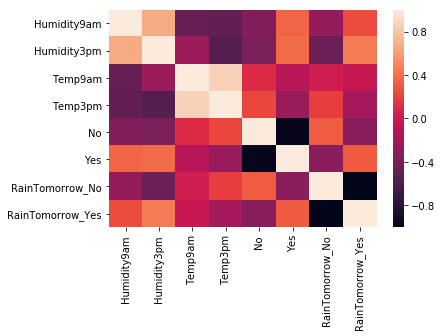

In [54]:
sb.heatmap(pd.concat([predictivas, objetivo], sort=False, axis=1).corr())

Del heatmap superior podemos visualizar la relación entre las variables, se puede que la humedad del día implica una gran probabilidad que llueva al dia siguiente, lo mismo pasa si el día anterior llueve, pero en menor medida

In [158]:
print(predictivas)
X = predictivas.values
X

        Humidity9am  Humidity3pm  Temp9am  Temp3pm  No  Yes
0              71.0         22.0     16.9     21.8   1    0
1              44.0         25.0     17.2     24.3   1    0
2              38.0         30.0     21.0     23.2   1    0
3              45.0         16.0     18.1     26.5   1    0
4              82.0         33.0     17.8     29.7   1    0
5              55.0         23.0     20.6     28.9   1    0
6              49.0         19.0     18.1     24.6   1    0
7              48.0         19.0     16.3     25.5   1    0
8              42.0          9.0     18.3     30.2   1    0
9              58.0         27.0     20.1     28.2   0    1
10             48.0         22.0     20.4     28.8   1    0
11             89.0         91.0     15.9     17.0   0    1
12             76.0         93.0     17.4     15.8   0    1
13             65.0         43.0     15.8     19.8   0    1
15             69.0         82.0     17.2     18.1   1    0
16             80.0         65.0     18.

array([[71. , 22. , 16.9, 21.8,  1. ,  0. ],
       [44. , 25. , 17.2, 24.3,  1. ,  0. ],
       [38. , 30. , 21. , 23.2,  1. ,  0. ],
       ...,
       [56. , 21. , 10.9, 24.5,  1. ,  0. ],
       [53. , 24. , 12.5, 26.1,  1. ,  0. ],
       [51. , 24. , 15.1, 26. ,  1. ,  0. ]])

In [115]:
y = objetivo_raw.values
lista = []
for i in y:
    lista.append([1 if i[0] == "Yes" else 0])
y = lista

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

print(X_test)

[[82.  50.  15.1 21.7  0.   1. ]
 [ 5.   2.  28.3 37.1  1.   0. ]
 [71.  70.  10.5  9.6  0.   1. ]
 ...
 [76.  44.  16.1 26.3  1.   0. ]
 [73.  48.  28.2 32.7  0.   1. ]
 [95.  94.  14.4 15.2  0.   1. ]]


In [118]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[-0.00577224  0.06174243  0.03199533 -0.01315408 -1.93678638 -1.06521258]]
intercept: [-3.00199896]


In [132]:
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [169]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [156]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[30421,  1505],
       [ 5300,  3721]], dtype=int64)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     31926
           1       0.71      0.41      0.52      9021

   micro avg       0.83      0.83      0.83     40947
   macro avg       0.78      0.68      0.71     40947
weighted avg       0.82      0.83      0.82     40947



## Se define la librería que se va a usar para la predicción

In [164]:
def predecir(humidity1, humidity2, temp1, temp2, rainToday): #Humidity9am  Humidity3pm  Temp9am  Temp3pm  No  Yes
    return humidity1*LogReg.coef_[0,0] + humidity2*LogReg.coef_[0,1] + temp1*LogReg.coef_[0,2] + temp2*LogReg.coef_[0,3] + (LogReg.coef_[0,5] if rainToday else LogReg.coef_[0,4]) + LogReg.intercept_[0]

In [172]:
predecir(80, 80, 20, 20, True)

0.7872288292994587